In [42]:
import json
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import load_model
from IPython.display import HTML
import pandas as pd

In [2]:
vocab_size = 10000
embedding_dim = 20
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
!wget --no-check-certificate  https://raw.githubusercontent.com/prikarsartam/Jokerman/main/Jokerman_Dataset.json

--2022-09-18 16:00:59--  https://raw.githubusercontent.com/prikarsartam/Jokerman/main/Jokerman_Dataset.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6057046 (5.8M) [text/plain]
Saving to: ‘Jokerman_Dataset.json’

Jokerman_Dataset.js 100%[===================>]   5.78M  --.-KB/s    in 0.06s   

2022-09-18 16:01:00 (94.2 MB/s) - ‘Jokerman_Dataset.json’ saved [6057046/6057046]



In [4]:
datastore = [json.loads(line) for line in open('Jokerman_Dataset.json', 'r')]

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [74]:
def flip(num):
  if num!=0:
    return 0
  elif num==0:
    return 1
  else:
    return 0

In [76]:
flip(1)

0

In [109]:
def Random_N_generator(MAX,N):
  list_forus = []
  for i in range(0,N):
    list_forus.append(random.randint(0,MAX-1))
  return list_forus

JsoNBoy = {"sentence": [] , "has_Semantic_Integrity":[], "Place":[] }

rand_list = Random_N_generator(training_size, 10)

for i in range(0,10):    # put the number of iterations necessary
  JsoNBoy["sentence"].append(sentences[int(rand_list[i])])
  JsoNBoy["has_Semantic_Integrity"].append(flip(int(labels[rand_list[i]])))
  JsoNBoy["Place"].append(int(rand_list[i]))

d_f = pd.DataFrame.from_dict(JsoNBoy, orient='index')
d_f = d_f.transpose()
HTML(d_f.to_html())

,sentence,has_Semantic_Integrity,Place
0,man coasting through life entirely on benefit of doubt,0,17613
1,asian-american caucus demands investigation after chinese-american scientist accused of spying,1,6533
2,wall wishes it were load-bearing,0,6347
3,unidentified yowling animal in carrier apparently named kiwi,0,15741
4,eric's bogosian's operation nemesis: can a genocide ever truly be avenged?,1,9170
5,marco rubio wins puerto rico primary,1,2302
6,john boehner: we should know if paul ryan is running for speaker soon,1,3824
7,the two opposing world views in the white house,1,4596
8,embracing the darkness: a weird and wonderful chat with the amazing aubrey plaza,1,11485
9,how i became that middle-aged woman who uses baby talk with her dogs,1,2389


In [67]:
int(Random_N_generator(training_size, 10)[])

663

In [68]:
sentences[int(Random_N_generator(training_size, 10)[i])]

'unpopular opinion: why i think the sat is a good thing'

In [58]:

# JsoNBoy["sentence"].append('fucks')
# JsoNBoy["sentence"][0]

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [14]:
# LSTM model with comparetively HIGH number of parameters 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 20)           200000    
                                                                 
 bidirectional_7 (Bidirectio  (None, 1024)             2183168   
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                65600     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,448,833
Trainable params: 2,448,833
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 43s - loss: 0.4148 - accuracy: 0.7941 - val_loss: 0.3248 - val_accuracy: 0.8558 - 43s/epoch - 69ms/step
Epoch 2/30
625/625 - 35s - loss: 0.2221 - accuracy: 0.9103 - val_loss: 0.3320 - val_accuracy: 0.8595 - 35s/epoch - 56ms/step
Epoch 3/30
625/625 - 36s - loss: 0.1370 - accuracy: 0.9495 - val_loss: 0.3771 - val_accuracy: 0.8493 - 36s/epoch - 57ms/step
Epoch 4/30
625/625 - 35s - loss: 0.0891 - accuracy: 0.9681 - val_loss: 0.4897 - val_accuracy: 0.8457 - 35s/epoch - 57ms/step
Epoch 5/30
625/625 - 36s - loss: 0.0630 - accuracy: 0.9778 - val_loss: 0.5266 - val_accuracy: 0.8400 - 36s/epoch - 57ms/step
Epoch 6/30
625/625 - 35s - loss: 0.2060 - accuracy: 0.9124 - val_loss: 0.4721 - val_accuracy: 0.8000 - 35s/epoch - 57ms/step
Epoch 7/30
625/625 - 35s - loss: 0.1567 - accuracy: 0.9374 - val_loss: 0.6520 - val_accuracy: 0.8051 - 35s/epoch - 57ms/step
Epoch 8/30
625/625 - 36s - loss: 0.0663 - accuracy: 0.9752 - val_loss: 0.6004 - val_accuracy: 0.8372 - 36s/epoch - 57ms/step


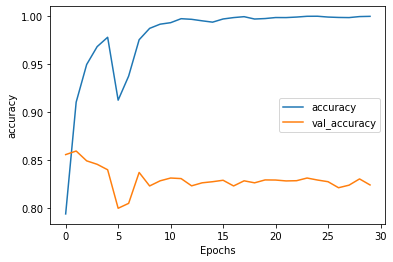

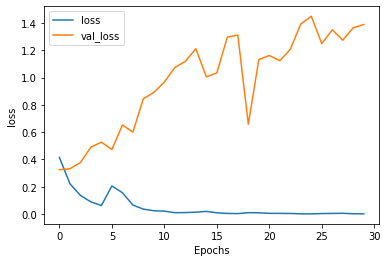

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
print("\n")
plot_graphs(history, "loss")

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]

print(weights)

print(weights.shape) # shape: (vocab_size, embedding_dim)

[[-0.0786994   0.11598209 -0.03092725 ... -0.0640559   0.01913758
   0.02944556]
 [-0.02174035  0.02149551 -0.01789952 ... -0.00620461 -0.00786921
  -0.02823145]
 [-0.07239373 -0.02909514 -0.08607303 ... -0.05607282  0.056141
   0.01547315]
 ...
 [ 0.03881737 -0.03345536 -0.03361979 ...  0.04983361  0.04992137
   0.00922491]
 [-0.12516516  0.03565587  0.0922006  ... -0.17086981 -0.09787909
  -0.1260984 ]
 [-0.13063666  0.09934385  0.13815856 ... -0.1280208  -0.12494733
  -0.21007365]]
(10000, 20)


In [17]:
model.save('Jokerman.h5')

In [104]:
saved_model = load_model('/content/Jokerman.h5')

In [101]:
def normalized_inverse(float_num):
  return (1/float_num)


def Run_Jokerman():
 # saved_model = load_model(PATH_To_Model_h5_File)
  no_of_sentences = int(input("Enter the number of sentences you want as input: "))

  sentence = []
  print("\n")
  for i in range(0,no_of_sentences):
    inpt = input(str(i+1)+ "-th sentence: ")
    sentence.append(str(inpt))

  print("\n\n")

  # sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

  sequences = tokenizer.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  result = saved_model.predict(padded)
  print("\n")
  result

  float_result=[]

  for j in range(0,len(result)):
    float_result.append(str(float(normalized_inverse(result[i]))))

  JsoNBoy = {"Syntagma":sentence, "Semantic Integrity":float_result
                      }
  df = pd.DataFrame.from_dict(JsoNBoy, orient='index')
  df = df.transpose()
  return HTML(df.to_html()) 
  print("\n")

In [ ]:
Run_Jokerman()